In [ ]:
#start presentation with a minute of silence?
DD to format outside the graphs

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
from sodapy import Socrata

In [2]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [34]:
client = Socrata("healthdata.gov", None)

results = client.get("g62h-syeh", limit=1000000)

# Convert to pandas DataFrame
raw_df = pd.DataFrame.from_records(results)

In [35]:
raw_df.tail()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,staffed_icu_pediatric_patients_confirmed_covid,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_unknown,on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses,previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used
57021,GA,2021-07-29T00:00:00.000,26,121,23,30,117,23,9,167,...,88,228,88,NaN,NaN,NaN,NaN,NaN,1142,45
57022,RI,2021-03-28T00:00:00.000,3,11,1,3,11,1,21,14,...,14,96,14,NaN,NaN,NaN,NaN,NaN,0,0
57023,IL,2021-03-29T00:00:00.000,13,153,23,15,151,23,61,184,...,184,1109,184,NaN,NaN,NaN,NaN,NaN,1006,18
57024,DC,2021-06-25T00:00:00.000,0,13,1,0,13,1,0,12,...,1,10,1,NaN,NaN,NaN,NaN,NaN,194,5
57025,KY,2021-04-24T00:00:00.000,0,25,92,3,112,2,7,115,...,25,1,25,NaN,NaN,NaN,NaN,NaN,180,1


In [5]:
# # Convert the date to datetime64
# df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
  
# # Filter data between two dates
# filtered_df = df.loc[(df['date'] >= '2020-09-01')
#                      & (df['date'] < '2020-09-15')]
# # Display
# filtered_df

In [49]:
california_df = raw_df.query("state == 'CA'")
california_df['date'] = pd.to_datetime(california_df['date'], format='%Y-%m-%d')

ca_20_21_df = california_df.loc[(california_df['date'] < '2022-01-01')]
#                      & (df['date'] < '2020-09-15')]
ca_20_21_df


C:\Users\david\AppData\Local\Temp\ipykernel_9176\2328923124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_df['date'] = pd.to_datetime(california_df['date'], format='%Y-%m-%d')


,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,staffed_icu_pediatric_patients_confirmed_covid,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_unknown,on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses,previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used
837,CA,2021-01-20,171,235,11,187,219,11,104,409,...,406,3528,406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,CA,2020-11-05,62,334,15,85,311,15,13,403,...,400,3440,400,0,NaN,NaN,NaN,NaN,NaN,NaN
874,CA,2020-11-15,64,336,12,78,322,12,23,404,...,400,3505,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,CA,2020-11-22,75,325,11,92,308,11,34,403,...,401,3515,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
965,CA,2020-11-17,65,308,11,81,292,11,161,376,...,372,3533,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56795,CA,2021-05-08,56,279,79,74,261,79,24,406,...,401,3635,401,NaN,NaN,NaN,NaN,NaN,4035,341
56824,CA,2021-04-29,67,314,38,87,295,37,32,411,...,408,3644,408,NaN,NaN,NaN,NaN,NaN,3991,293
56878,CA,2021-07-05,55,286,40,72,268,41,43,373,...,370,3812,370,NaN,NaN,NaN,NaN,NaN,3593,245
57001,CA,2021-06-21,56,283,36,75,263,37,11,367,...,365,3704,365,NaN,NaN,NaN,NaN,NaN,3985,235


In [ ]:
# # KEEEPPP Build scatter plot for latitude vs. temperature
# # YOUR CODE HERE

# lats = city_data_df["Lat"]
# max_temps = city_data_df["Max Temp"]
# humidity = city_data_df["Humidity"]
# cloudiness = city_data_df["Cloudiness"]
# wind_speed = city_data_df["Wind Speed"]

# plt.scatter(lats,
#             max_temps,
#             edgecolor="black", linewidths=1, marker="o",
#             alpha=0.8, label="Cities")

# plt.title(f"City Max Latitude vs. Temperature ("+ time.strftime("%Y-%m-%d") +")")
# plt.ylabel("Max Temperature (F)")
# plt.xlabel("Latitude")
# plt.grid(True)

# # Save the figure
# plt.savefig("output_data/Fig1.png")

# # Show plot
# plt.show()

In [50]:
print(ca_20_21_df["date"].min())

print(ca_20_21_df["date"].max())

print(ca_20_21_df["date"].count)


2020-02-04 00:00:00
2021-12-31 00:00:00
<bound method Series.count of 837     2021-01-20
848     2020-11-05
874     2020-11-15
900     2020-11-22
965     2020-11-17
           ...    
56795   2021-05-08
56824   2021-04-29
56878   2021-07-05
57001   2021-06-21
57018   2021-06-08
Name: date, Length: 676, dtype: datetime64[ns]>


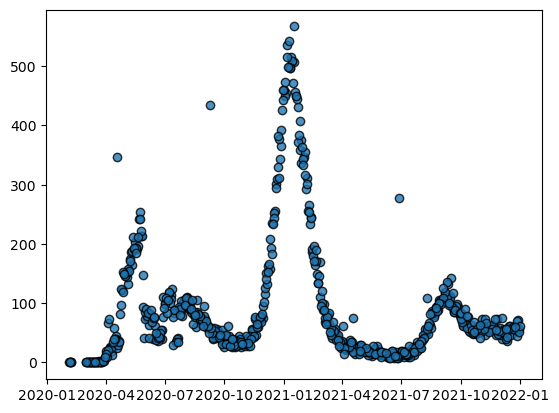

In [60]:
#GRAPH Q 1 WE STILL NEED NUMBER 2 :) VA to format
deaths = ca_20_21_df["deaths_covid"].astype(int)
date = ca_20_21_df["date"]

plt.scatter(date,deaths,
           edgecolor="black", linewidths=1, marker="o",
        alpha=0.8, label="Hospital Covid Deaths")

plt.show()
#numbers on the bottom diags, change date formats (m)
#labels and title, red dots,



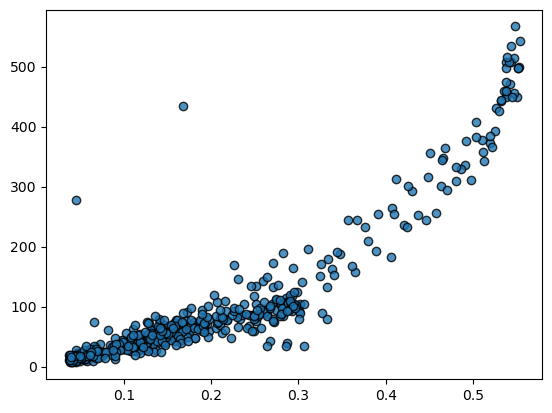

In [64]:
#GRAPH 1.B DEATHS, TO ICU BEDS  VA to format
# death_focus_df = california_df.loc[(california_df['date'] < '2021-04-30')
#                    #   & (california_df['date'] > '2020-10-01')]
# # deathsf = death_focus_df["deaths_covid"].astype(int)
# # date = death_focus_df["date"]

plt.scatter(covid_icu,deaths,
           edgecolor="black", linewidths=1, marker="o",
        alpha=0.8, label="Hospital Covid Deaths")


plt.show()
#numbers on the bottom diags, change date formats (m)
#labels and title, red dots, 

In [ ]:
#line chart that plots, death, and covid ICU rates, check out how the relate. 

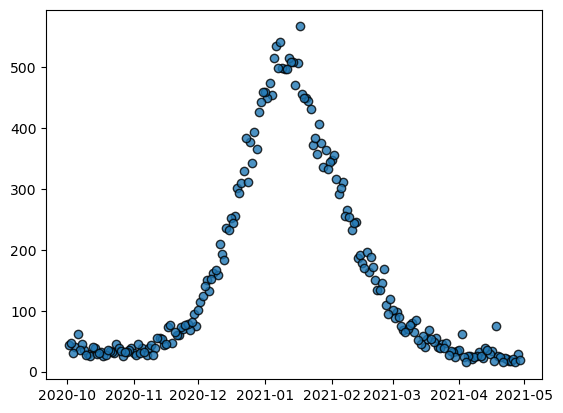

In [62]:
#JD to format #aestetics lets se if whe keep it 

death_focus_df = california_df.loc[(california_df['date'] < '2021-04-30')
                      & (california_df['date'] > '2020-10-01')]
deathsf = death_focus_df["deaths_covid"].astype(int)
date = death_focus_df["date"]

plt.scatter(date,deathsf,
           edgecolor="black", linewidths=1, marker="o",
        alpha=0.8, label="Hospital Covid Deaths")

plt.show()
#numbers on the bottom diags, change date formats (m)
#labels and title, red dots, 

In [ ]:
# staffed_adult_icu_bed_occupancy
# staffed_adult_icu_bed_occupancy_coverage
# staffed_icu_adult_patients_confirmed_and_suspected_covid
# staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage
# staffed_icu_adult_patients_confirmed_covid
# staffed_icu_adult_patients_confirmed_covid_coverage
# total_staffed_adult_icu_beds
# total_staffed_adult_icu_beds_coverage
# adult_icu_bed_covid_utilization
# adult_icu_bed_covid_utilization_coverage
# adult_icu_bed_covid_utilization_numerator
# adult_icu_bed_covid_utilization_denominator

# adult_icu_bed_utilization
# adult_icu_bed_utilization_coverage
# adult_icu_bed_utilization_numerator
# adult_icu_bed_utilization_denominator

# icu_patients_confirmed_influenza
# icu_patients_confirmed_influenza_coverage
# staffed_icu_pediatric_patients_confirmed_covid
# staffed_icu_pediatric_patients_confirmed_covid_coverage
# staffed_pediatric_icu_bed_occupancy
# staffed_pediatric_icu_bed_occupancy_coverage
# total_staffed_pediatric_icu_beds
# total_staffed_pediatric_icu_beds_coverage

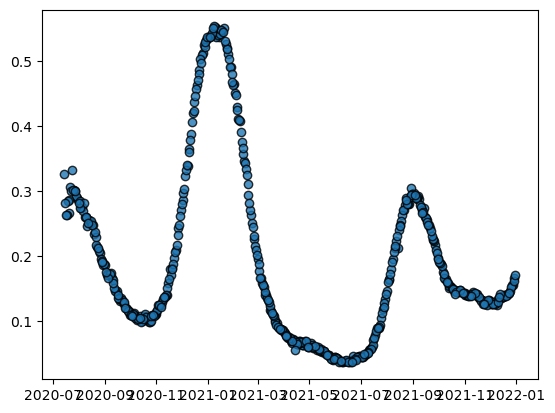

In [54]:
###How did COVID ICU rates change throughout 2020-2021? Q2 graph 1 of 2 JD to format

covid_icu = ca_20_21_df["adult_icu_bed_covid_utilization"].astype(float)
date = ca_20_21_df["date"]

plt.scatter(date,covid_icu,
           edgecolor="black", linewidths=1, marker="o",
        alpha=0.8, label="Hospital Covid ICU rates Over Time")

plt.show()

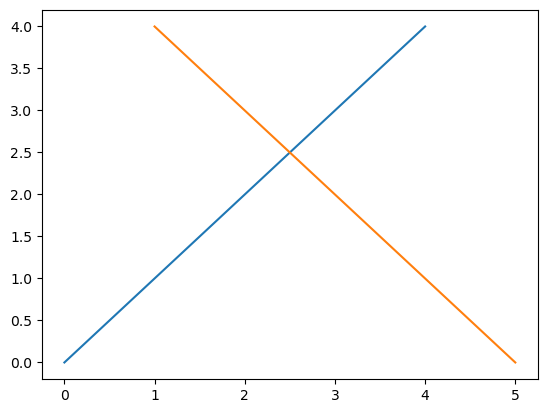

In [72]:
fig, ax=plt.subplots()#example to be deleted
ax.plot(range(5), range(5))
ax.plot(range(5, 0, -1), range(5))

# df.plot(ax=ax)

In [ ]:
# #Q2 IDEA: Stacked bars.2b :)  
# import matplotlib.pyplot as plt


# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# men_means = [20, 35, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]
# men_std = [2, 3, 4, 1, 2]
# women_std = [3, 5, 2, 3, 3]
# width = 0.35       # the width of the bars: can also be len(x) sequence

# fig, ax = plt.subplots()

# ax.bar(labels, men_means, width, yerr=men_std, label='Men')
# ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
#        label='Women')

# ax.set_ylabel('Scores')
# ax.set_title('Scores by group and gender')
# ax.legend()

# plt.show()


In [90]:
# # df.drop(df.loc[df['line_race']==0].index, inplace=True)
# q3_df = ca_20_21_df.loc[ca_20_21_df['adult_icu_bed_covid_utilization_numerator']=='NaN'].index, inplace = True
# q3_df
### dropped Nan Val for adult_icu_bed_covid_utilization_numerator
q3_df = ca_20_21_df[ca_20_21_df['adult_icu_bed_covid_utilization_numerator'].notna()]
q3_df


,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,staffed_icu_pediatric_patients_confirmed_covid,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_unknown,on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses,previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used
837,CA,2021-01-20,171,235,11,187,219,11,104,409,...,406,3528,406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
848,CA,2020-11-05,62,334,15,85,311,15,13,403,...,400,3440,400,0,NaN,NaN,NaN,NaN,NaN,NaN
874,CA,2020-11-15,64,336,12,78,322,12,23,404,...,400,3505,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,CA,2020-11-22,75,325,11,92,308,11,34,403,...,401,3515,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
965,CA,2020-11-17,65,308,11,81,292,11,161,376,...,372,3533,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56795,CA,2021-05-08,56,279,79,74,261,79,24,406,...,401,3635,401,NaN,NaN,NaN,NaN,NaN,4035,341
56824,CA,2021-04-29,67,314,38,87,295,37,32,411,...,408,3644,408,NaN,NaN,NaN,NaN,NaN,3991,293
56878,CA,2021-07-05,55,286,40,72,268,41,43,373,...,370,3812,370,NaN,NaN,NaN,NaN,NaN,3593,245
57001,CA,2021-06-21,56,283,36,75,263,37,11,367,...,365,3704,365,NaN,NaN,NaN,NaN,NaN,3985,235


ValueError: shape mismatch: objects cannot be broadcast to a single shape

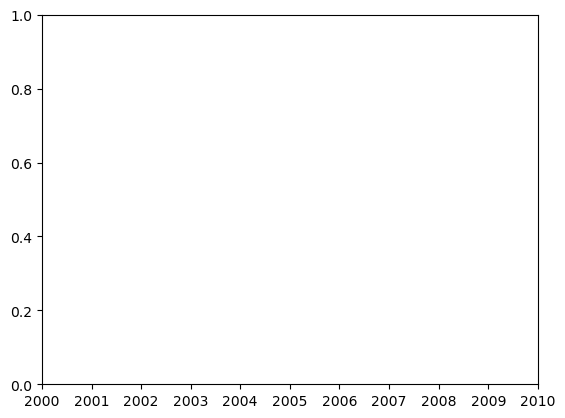

In [91]:
### DAVID TO FINISH Q3 #1
# inpatient_beds_used_covid     adult_icu_bed_covid_utilization_numerator
labels = date
inpatient_beds_used_covid = q3_df["inpatient_beds_used_covid"].astype(int)
adult_icu_bed_covid_utilization_numerator = q3_df['adult_icu_bed_covid_utilization_numerator'].astype(int)
width = 0.35 
fig, ax = plt.subplots()

ax.bar(labels,inpatient_beds_used_covid, width)
ax.bar(labels,adult_icu_bed_covid_utilization_numerator, width,bottom = inpatient_beds_used_covid)

plt.show()


In [ ]:
#Q3 BRAPH 1 How did staffing change throughout 2020-2021?
###How did COVID ICU rates change throughout 2020-2021? Q2 graph 1 of 2 
covid_icu = ca_20_21_df["adult_icu_bed_covid_utilization"].astype(float)
date = ca_20_21_df["date"]

plt.scatter(date,covid_icu,
           edgecolor="black", linewidths=1, marker="o",
        alpha=0.8, label="Hospital Covid ICU rates Over Time")

plt.show()


In [ ]:
#SCRATCH 

# total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage | number of reporting hospitals 
# # inpatient_beds_used_covid | number
# # inpatient_beds_utilization 
# # adult_icu_bed_covid_utilization_numerator
# inpatient_bed_covid_utilization_numerator

# adult_icu_bed_covid_utilization_numerator

# inpatient_beds_used_covid
# total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage | number of reporting hospitals 
# inpatient_beds_used_covid | number
# inpatient_beds_utilization 